# Baseball Pitch Prediction - Exploratory Data Analysis

This notebook explores the MLB pitch data collected for our prediction model. We'll analyze patterns in pitch selection, game situations, and player tendencies.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Configure plot settings
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

## 1. Load and Examine the Data

In [2]:
# Load the processed data
data = pd.read_csv('../../data/processed/modeling_data_2021_to_2023.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFeature Names:")
print(data.columns.tolist())
print("\nBasic Statistics:")
data.describe()

Dataset Shape: (2135327, 22)

Feature Names:
['is_fastball', 'balls', 'strikes', 'outs_when_up', 'inning', 'hitter_count', 'pitcher_count', 'neutral_count', 'early_inning', 'middle_inning', 'late_inning', 'pitcher_fb_pct', 'pitcher_count_fb_pct', 'pitcher_hitter_count_fb_pct', 'catcher_fb_pct', 'catcher_count_fb_pct', 'batter_success_vs_fb', 'batter_success_vs_os', 'batter_fb_os_diff', 'first_pitch', 'prev_is_fastball', 'consecutive_counter']

Basic Statistics:


,is_fastball,balls,strikes,outs_when_up,inning,hitter_count,pitcher_count,neutral_count,early_inning,middle_inning,...,pitcher_count_fb_pct,pitcher_hitter_count_fb_pct,catcher_fb_pct,catcher_count_fb_pct,batter_success_vs_fb,batter_success_vs_os,batter_fb_os_diff,first_pitch,prev_is_fastball,consecutive_counter
count,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,...,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06,2.135327e+06
mean,5.635263e-01,8.790157e-01,8.984891e-01,9.806311e-01,4.940616e+00,2.663770e-01,3.765779e-01,3.570451e-01,3.414447e-01,3.362633e-01,...,5.635263e-01,5.635263e-01,5.635263e-01,5.635263e-01,5.927514e-02,5.267180e-02,6.612256e-03,2.561477e-01,6.761498e-01,7.486071e-01
std,4.959481e-01,9.666895e-01,8.281974e-01,8.178861e-01,2.593078e+00,4.420638e-01,4.845277e-01,4.791284e-01,4.741944e-01,4.724303e-01,...,1.596189e-01,1.326957e-01,3.547709e-02,9.741888e-02,1.076910e-02,1.317017e-02,1.404276e-02,4.365044e-01,4.679437e-01,9.812726e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.599628e-01,4.746544e-01,5.409593e-01,4.963504e-01,5.385467e-02,4.429708e-02,-1.446478e-03,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.555556e-01,5.530474e-01,5.667794e-01,5.550285e-01,6.020447e-02,5.274173e-02,7.370715e-03,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,6.575592e-01,6.419869e-01,5.881403e-01,6.228919e-01,6.579727e-02,6.076389e-02,1.501479e-02,1.000000e+00,1.000000e+00,1.000000e+00
max,1.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,6.900489e-01,1.000000e+00,1.000000e+00,5.000000e-01,3.333333e-01,1.000000e+00,1.000000e+00,1.200000e+01


## 2. Pitch Type Distribution Analysis

Fastball Percentage: 56.35%
Offspeed Percentage: 43.65%


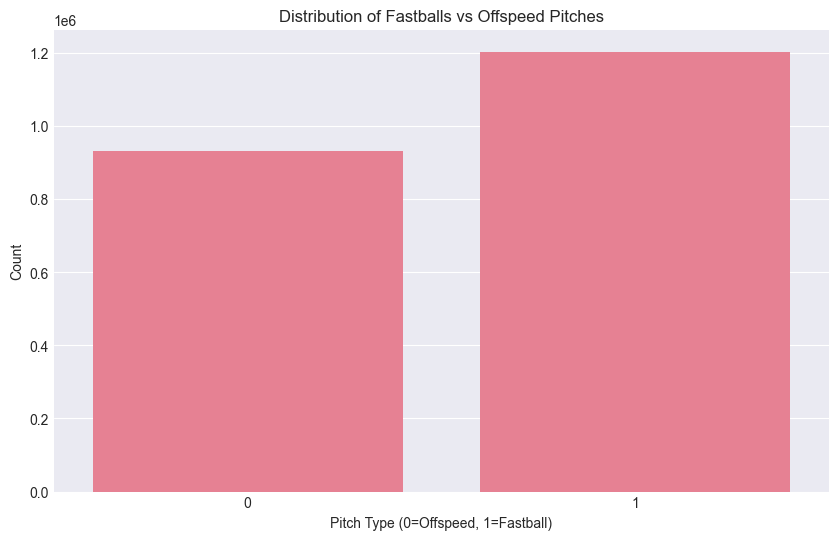

In [3]:
# Overall fastball vs offspeed distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='is_fastball')
plt.title('Distribution of Fastballs vs Offspeed Pitches')
plt.xlabel('Pitch Type (0=Offspeed, 1=Fastball)')
plt.ylabel('Count')

# Calculate and display percentages
fb_pct = (data['is_fastball'].mean() * 100)
print(f"Fastball Percentage: {fb_pct:.2f}%")
print(f"Offspeed Percentage: {100-fb_pct:.2f}%")

## 3. Game Situation Analysis

In [6]:
# Create a new 'count' column by combining 'balls' and 'strikes'
data['count'] = data['balls'].astype(str) + '-' + data['strikes'].astype(str)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '0-0'),
  Text(1, 0, '0-1'),
  Text(2, 0, '0-2'),
  Text(3, 0, '1-0'),
  Text(4, 0, '1-1'),
  Text(5, 0, '1-2'),
  Text(6, 0, '2-0'),
  Text(7, 0, '2-1'),
  Text(8, 0, '2-2'),
  Text(9, 0, '3-0'),
  Text(10, 0, '3-1'),
  Text(11, 0, '3-2')])

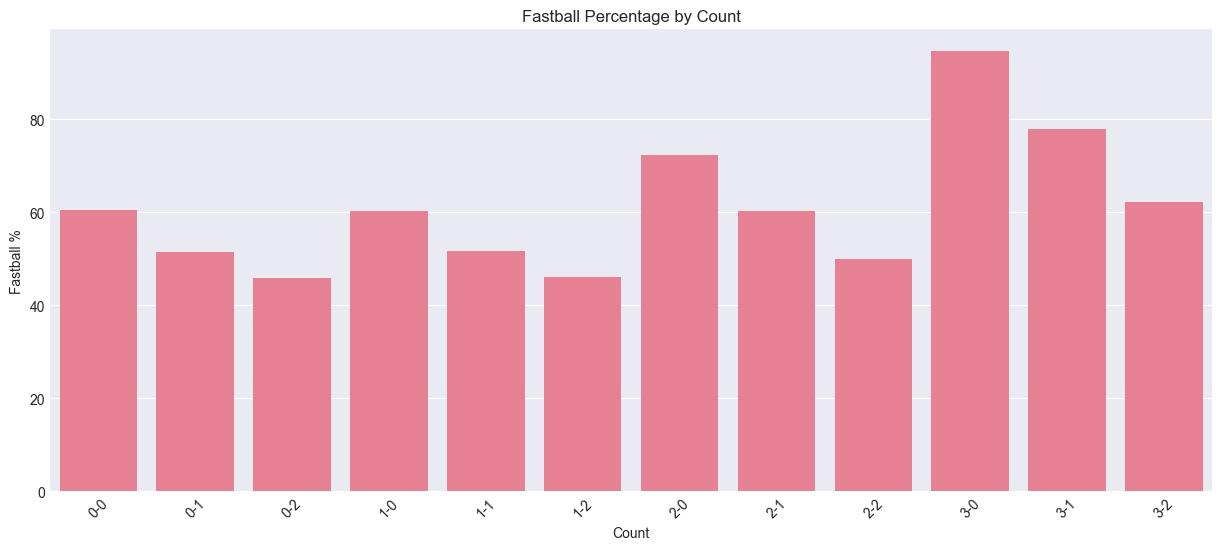

In [7]:
# Analyze pitch selection by count
plt.figure(figsize=(15, 6))
counts = ['0-0', '0-1', '0-2', '1-0', '1-1', '1-2', '2-0', '2-1', '2-2', '3-0', '3-1', '3-2']
fb_by_count = data.groupby('count')['is_fastball'].mean().reindex(counts) * 100

sns.barplot(x=fb_by_count.index, y=fb_by_count.values)
plt.title('Fastball Percentage by Count')
plt.xlabel('Count')
plt.ylabel('Fastball %')
plt.xticks(rotation=45)

## 4. Pitcher Tendencies Analysis

Pitcher Fastball Percentage Statistics:
count    2.135327e+06
mean     5.635263e-01
std      1.171561e-01
min      0.000000e+00
25%      4.888023e-01
50%      5.563839e-01
75%      6.330883e-01
max      1.000000e+00
Name: pitcher_fb_pct, dtype: float64


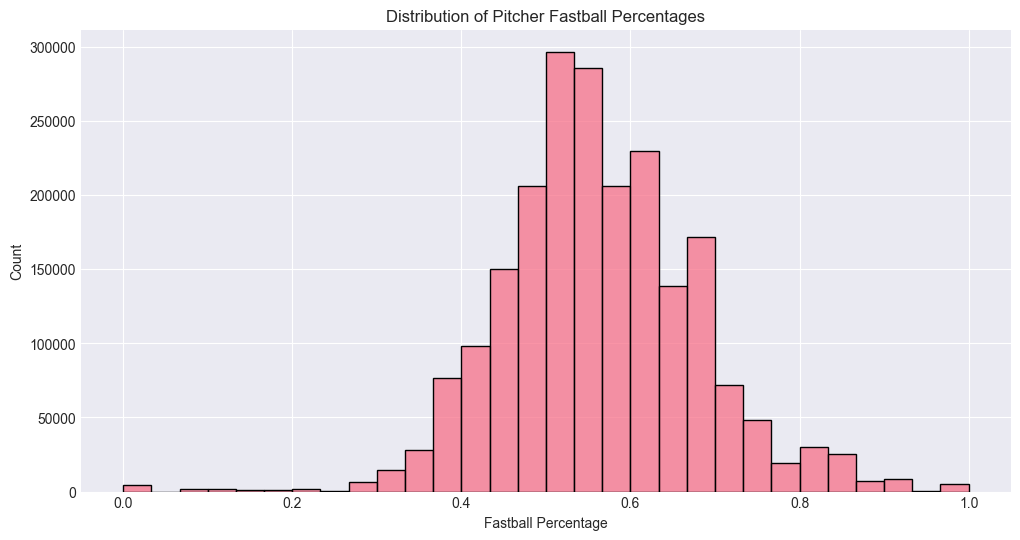

In [8]:
# Distribution of pitcher fastball percentages
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='pitcher_fb_pct', bins=30)
plt.title('Distribution of Pitcher Fastball Percentages')
plt.xlabel('Fastball Percentage')
plt.ylabel('Count')

# Show statistics
print("Pitcher Fastball Percentage Statistics:")
print(data['pitcher_fb_pct'].describe())

## 5. Count and Pressure Situation Analysis

([0, 1, 2],
 [Text(0, 0, 'hitter_count'),
  Text(1, 0, 'pitcher_count'),
  Text(2, 0, 'neutral_count')])

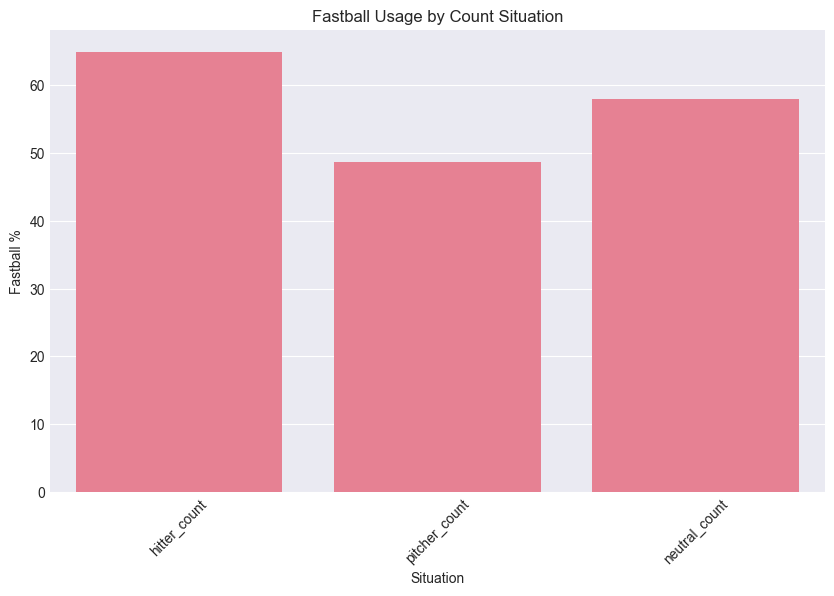

In [9]:
# Compare fastball usage in different count situations
situations = ['hitter_count', 'pitcher_count', 'neutral_count']
fb_by_situation = [data[data[sit] == 1]['is_fastball'].mean() * 100 for sit in situations]

plt.figure(figsize=(10, 6))
sns.barplot(x=situations, y=fb_by_situation)
plt.title('Fastball Usage by Count Situation')
plt.xlabel('Situation')
plt.ylabel('Fastball %')
plt.xticks(rotation=45)

## 6. Sequence Analysis

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

<Figure size 1000x600 with 0 Axes>

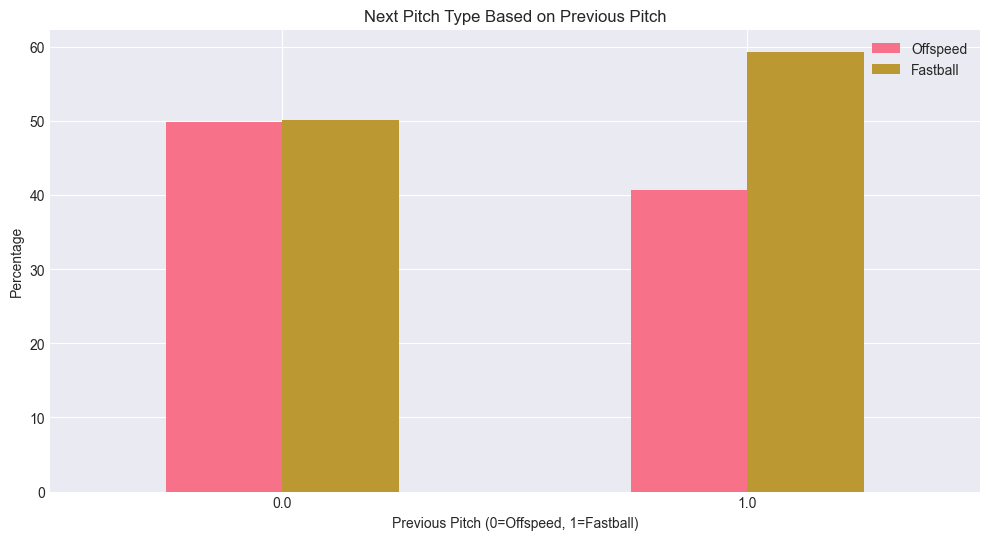

In [10]:
# Analyze how previous pitch affects next pitch selection
prev_next = pd.crosstab(data['prev_is_fastball'], data['is_fastball'], normalize='index') * 100

plt.figure(figsize=(10, 6))
prev_next.plot(kind='bar')
plt.title('Next Pitch Type Based on Previous Pitch')
plt.xlabel('Previous Pitch (0=Offspeed, 1=Fastball)')
plt.ylabel('Percentage')
plt.legend(['Offspeed', 'Fastball'])
plt.xticks(rotation=0)

## 7. Batter Performance Analysis

Average Success Rates:
vs Fastball: 0.059
vs Offspeed: 0.053


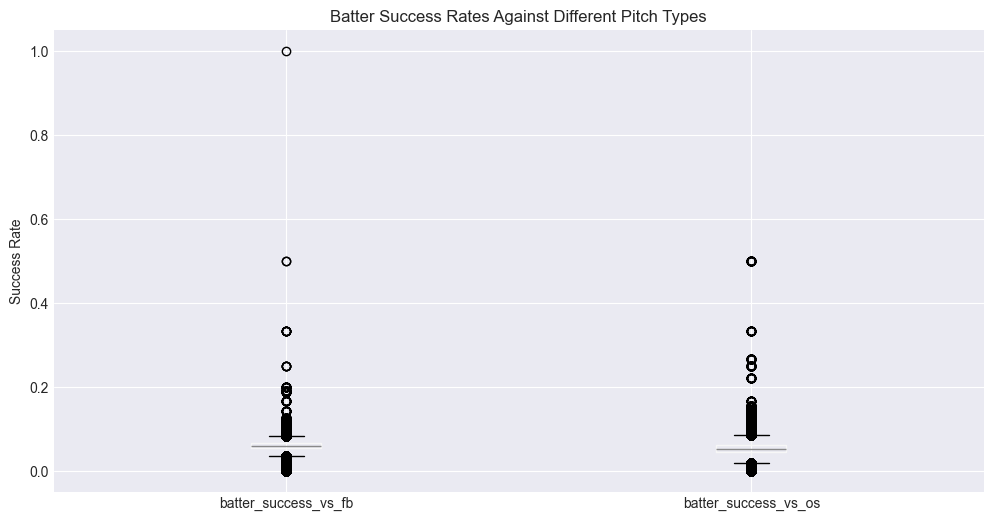

In [11]:
# Analyze batter success against different pitch types
plt.figure(figsize=(12, 6))
data[['batter_success_vs_fb', 'batter_success_vs_os']].boxplot()
plt.title('Batter Success Rates Against Different Pitch Types')
plt.ylabel('Success Rate')

# Print average success rates
print("Average Success Rates:")
print(f"vs Fastball: {data['batter_success_vs_fb'].mean():.3f}")
print(f"vs Offspeed: {data['batter_success_vs_os'].mean():.3f}")

## 8. Correlation Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'is_fastball'),
  Text(0, 1.5, 'balls'),
  Text(0, 2.5, 'strikes'),
  Text(0, 3.5, 'outs_when_up'),
  Text(0, 4.5, 'inning'),
  Text(0, 5.5, 'hitter_count'),
  Text(0, 6.5, 'pitcher_count'),
  Text(0, 7.5, 'neutral_count'),
  Text(0, 8.5, 'early_inning'),
  Text(0, 9.5, 'middle_inning'),
  Text(0, 10.5, 'late_inning'),
  Text(0, 11.5, 'pitcher_fb_pct'),
  Text(0, 12.5, 'pitcher_count_fb_pct'),
  Text(0, 13.5, 'pitcher_hitter_count_fb_pct'),
  Text(0, 14.5, 'catcher_fb_pct'),
  Text(0, 15.5, 'catcher_count_fb_pct'),
  Text(0, 16.5, 'batter_success_vs_fb'),
  Text(0, 17.5, 'batter_success_vs_os'),
  Text(0, 18.5, 'batter_fb_os_diff'),
  Text(0, 19.5, 'first_pitch'),
  Text(0, 20.5, 'prev_is_fastball'),
  Text(0, 21.5, 'consecutive_counter')])

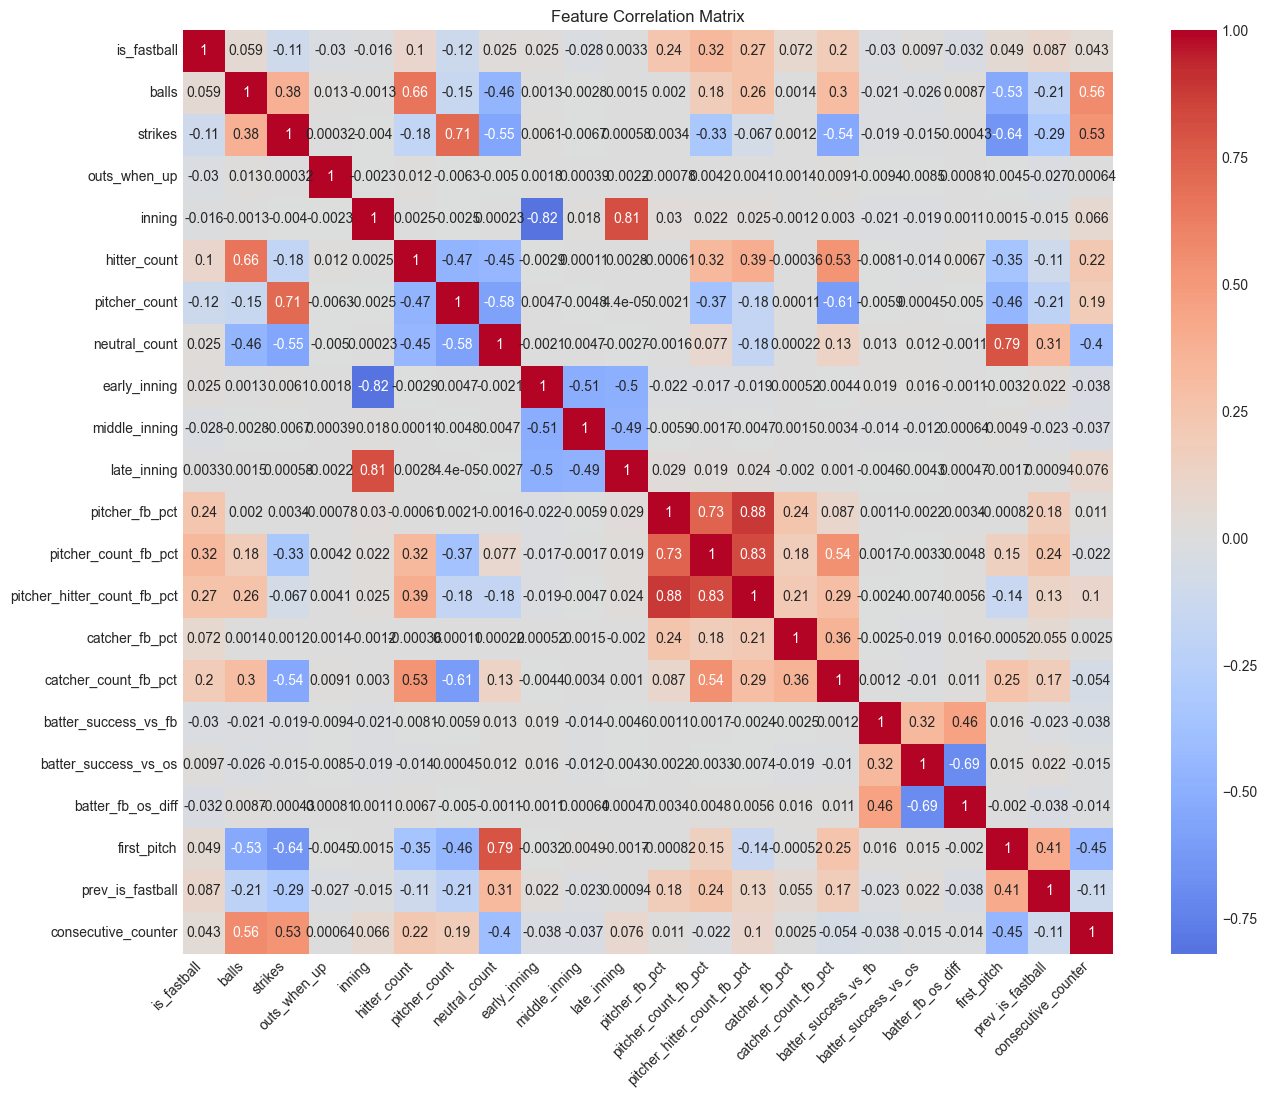

In [12]:
# Create correlation matrix of numerical features
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)